# DLlib neural network example: classification problem

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

from dllib.metrics.classification import BinaryCrossEntropy
from dllib.layers import Linear, Sigmoid, ReLu
from dllib.model import SequentialNN
from dllib.optimizers import SGD
from examples.backend import fit_and_evaluate, DataCatalogue, ModelType, SklearnClassifierWrapper

## Breast cancer dataset

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split


X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True)

dataset = DataCatalogue(
    model_type=ModelType.CLASSIFICATION,
    train={"X": X_train, "y": y_train},
    test={"X": X_test, "y": y_test},
)

### Logistic regression

In [4]:
evaluation = {}

logistic_regression_results = fit_and_evaluate(
    LogisticRegression(), 
    dataset,
)
evaluation.update(logistic_regression=logistic_regression_results)

### Dllib Neural network

In [5]:
nn = SequentialNN(
    layers=[
        Linear(input_size=X.shape[1], output_size=1),
        Sigmoid(),
    ],
    loss=BinaryCrossEntropy(),
    optimizer=SGD(learning_rate=1e-2)
)


neural_network_results = fit_and_evaluate(
    SklearnClassifierWrapper(nn), 
    dataset, 
    estimator__epochs=2000,
    estimator__batch_size=16,
    estimator__verbose=False,
)
evaluation.update(neural_network=neural_network_results)

### Model comparison

In [6]:
pivoted_evaluation = {
    model: {
        f"{metric_type}_{phase}": value 
        for phase, metrics in phases.items() 
        for metric_type, value in metrics.items()
    } 
    for model, phases in evaluation.items() 
}

df_evaluation = pd.DataFrame(pivoted_evaluation)
df_evaluation

,logistic_regression,neural_network
ROC-AUC_train,0.996618,0.995335
accuracy_train,0.983568,0.969484
ROC-AUC_test,1.000000,0.999566
accuracy_test,0.993007,0.979021


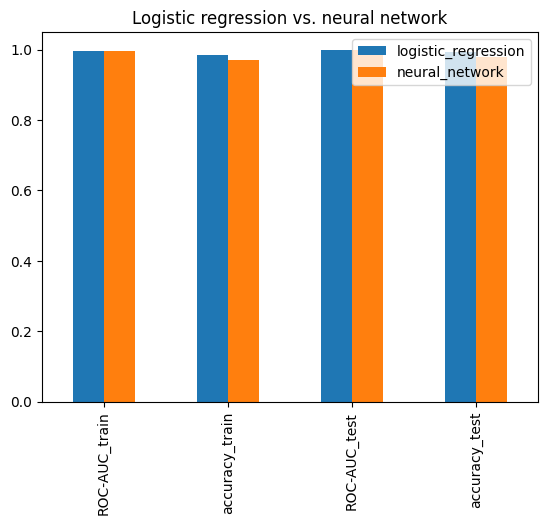

In [7]:
_ = df_evaluation.plot.bar(title="Logistic regression vs. neural network")

## Artificial non-linear problem dataset

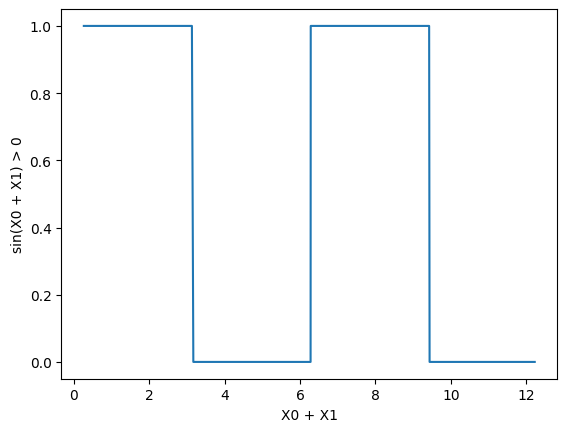

In [8]:
# generate X
X = 2 * np.pi * np.random.random(size=(1000, 2))

# generate y as a nonlinear function of X columns
X_sum = np.sum(X, axis=1)
y = (np.sin(X_sum) > 0).astype(int)

# y visualization
idx = np.argsort(X_sum)
plt.plot(X_sum[idx], y[idx])
plt.xlabel("X0 + X1")
plt.ylabel("sin(X0 + X1) > 0")
plt.show()

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

dataset = DataCatalogue(
    model_type=ModelType.CLASSIFICATION,
    train={"X": X_train, "y": y_train},
    test={"X": X_test, "y": y_test},
)

### Logistic regression

In [10]:
evaluation = {}

logistic_regression_results = fit_and_evaluate(
    LogisticRegression(), 
    dataset,
)
evaluation.update(logistic_regression=logistic_regression_results)

### Dllib Neural network

In [11]:
nn = SequentialNN(
    layers=[
        Linear(input_size=X.shape[1], output_size=16),
        ReLu(),
        Linear(input_size=16, output_size=1),
        Sigmoid(),
    ],
    loss=BinaryCrossEntropy(),
    optimizer=SGD(learning_rate=1e-2)
)


neural_network_results = fit_and_evaluate(
    SklearnClassifierWrapper(nn), 
    dataset, 
    estimator__epochs=2000,
    estimator__batch_size=16,
    estimator__verbose=False,
)
evaluation.update(neural_network=neural_network_results)

### Model comparison

In [12]:
pivoted_evaluation = {
    model: {
        f"{metric_type}_{phase}": value 
        for phase, metrics in phases.items() 
        for metric_type, value in metrics.items()
    } 
    for model, phases in evaluation.items() 
}

df_evaluation = pd.DataFrame(pivoted_evaluation)
df_evaluation

,logistic_regression,neural_network
ROC-AUC_train,0.473083,0.999338
accuracy_train,0.512000,0.986667
ROC-AUC_test,0.355995,0.999232
accuracy_test,0.456000,0.988000


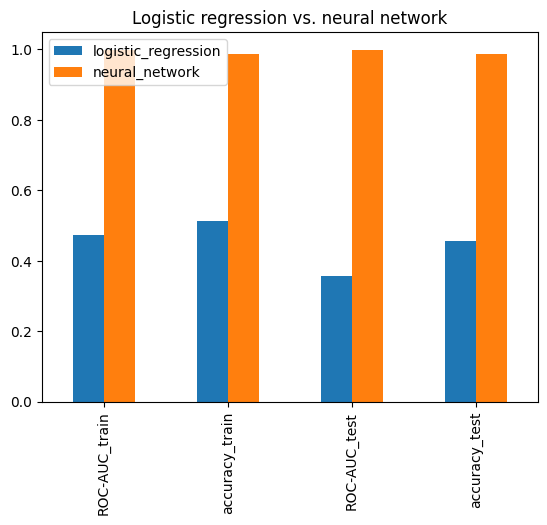

In [13]:
_ = df_evaluation.plot.bar(title="Logistic regression vs. neural network")